# 二十一.图像金字塔之图像向下取样和向上取样

1.图像金字塔

2.图像向下采样

3.图像向上采样


## 21.1.图像金字塔

前面讲解的图像采样处理可以降低图像的大小，本小节将补充图像金字塔知识，了解专门用于图像向上采样和向下采样的pyrUp()和pyrDown()函数。图像金字塔是指由一组图像且不同分别率的子图集合，它是图像多尺度表达的一种，以多分辨率来解释图像的结构，主要用于图像的分割或压缩。一幅图像的金字塔是一系列以金字塔形状排列的分辨率逐步降低，且来源于同一张原始图的图像集合。如图6-11所示，它包括了四层图像，将这一层一层的图像比喻成金字塔。图像金字塔可以通过梯次向下采样获得，直到达到某个终止条件才停止采样，在向下采样中，层级越高，则图像越小，分辨率越低。


生成图像金字塔主要包括两种方式——向下取样、向上取样。在图6-11中，将图像G0转换为G1、G2、G3，图像分辨率不断降低的过程称为向下取样；将G3转换为G2、G1、G0，图像分辨率不断增大的过程称为向上取样。


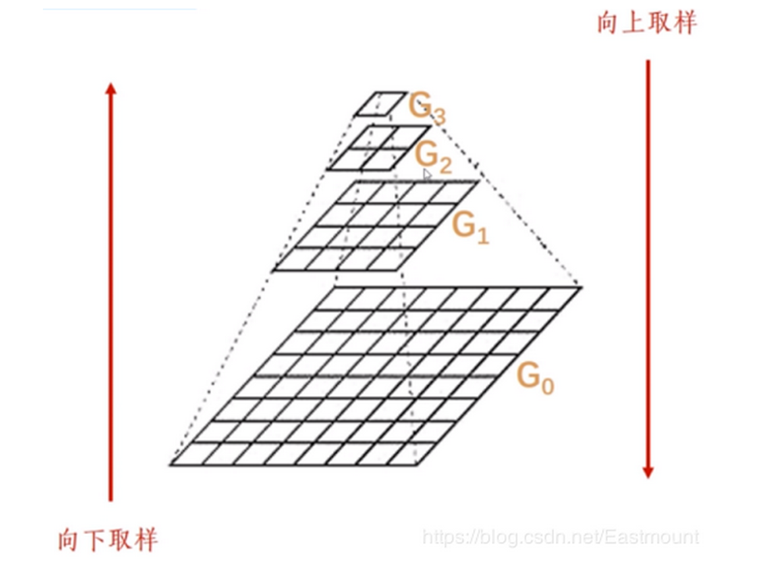

## 21.2.图像向下取样

在图像向下取样中，使用最多的是高斯金字塔。
它将对图像Gi进行高斯核卷积，并删除原图中
所有的偶数行和列，最终缩小图像。其中，高
斯核卷积运算就是对整幅图像进行加权平均的
过程，每一个像素点的值，都由其本身和邻域
内的其他像素值（权重不同）经过加权平均后
得到。常见的3×3和5×5高斯核如下：


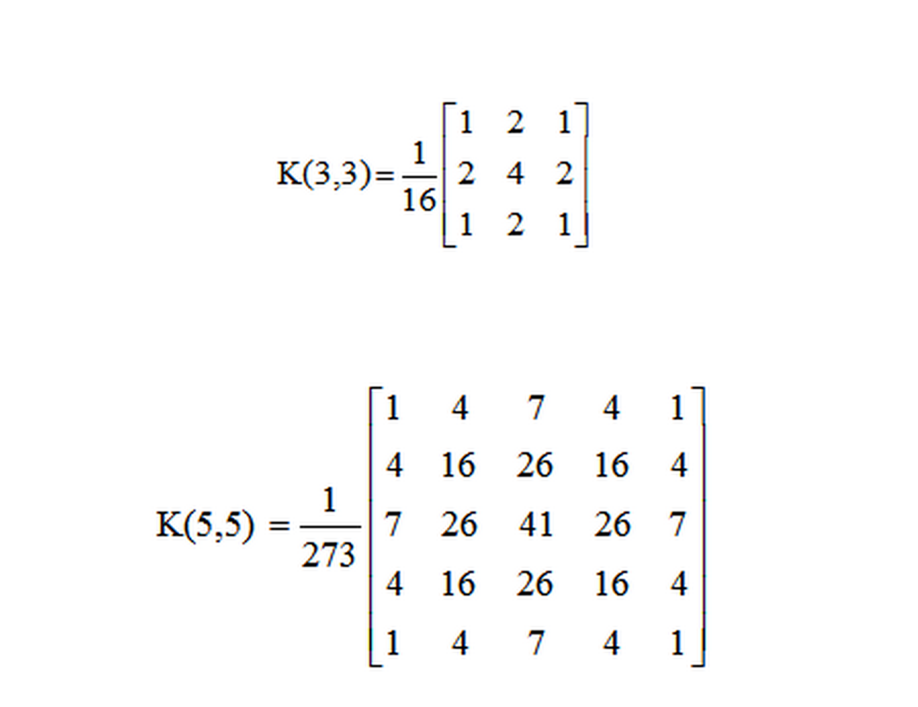

高斯核卷积让临近中心的像素点具有更高的重要度，对周围像素计算加权平均值，如图6-12所示，其中心位置权重最高为0.4。
显而易见，原始图像Gi具有M×N个像素，进行向下取样之后，所得到的图像Gi+1具有M/2×N/2个像素，只有原图的四分之一。通过对输入的原始图像不停迭代以上步骤就会得到整个金字塔。注意，由于每次向下取样会删除偶数行和列，所以它会不停地丢失图像的信息。


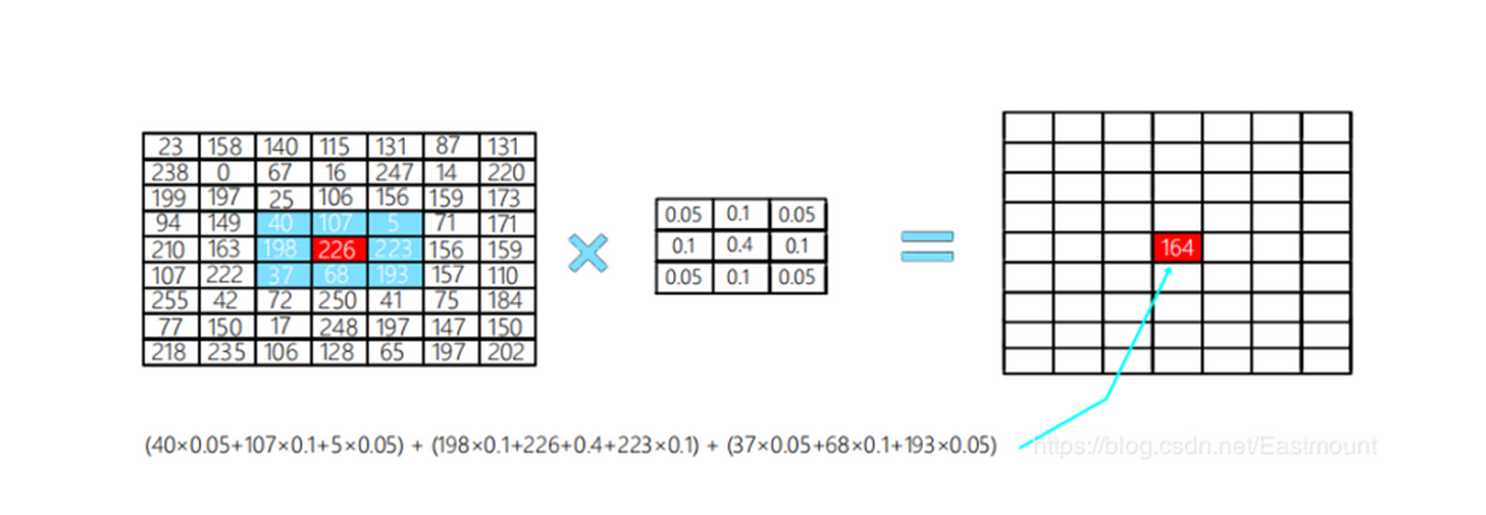

在OpenCV中，向下取样使用的函数为pyrDown()，其原型如下所示：dst = pyrDown(src[, dst[, dstsize[, borderType]]])src表示输入图像，dst表示输出图像，和输入图像具有一样的尺寸和类型dstsize表示输出图像的大小，默认值为Size()borderType表示像素外推方法，详见cv::bordertypes实现代码如下所示：


In [2]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像向下取样
r = cv2.pyrDown(img)

#显示图像
cv2.imshow('original', img)
cv2.imshow('PyrDown', r)
cv2.waitKey()
cv2.destroyAllWindows()



输出结果如图所示，它将原始图像压缩成原图的四分之一。


多次向下取样的代码如下：


In [3]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像向下取样
r1 = cv2.pyrDown(img)
r2 = cv2.pyrDown(r1)
r3 = cv2.pyrDown(r2)

#显示图像
cv2.imshow('original', img)
cv2.imshow('PyrDown1', r1)
cv2.imshow('PyrDown2', r2)
cv2.imshow('PyrDown3', r3)
cv2.waitKey()
cv2.destroyAllWindows()



## 21.3.图像向上取样

在图像向上取样是由小图像不断放图像的过程。它将图像在每个方向上扩大为原图像的2倍，新增的行和列均用0来填充，并使用与“向下取样”相同的卷积核乘以4，再与放大后的图像进行卷积运算，以获得“新增像素”的新值。如图6-15所示，它在原始像素45、123、89、149之间各新增了一行和一列值为0的像素。

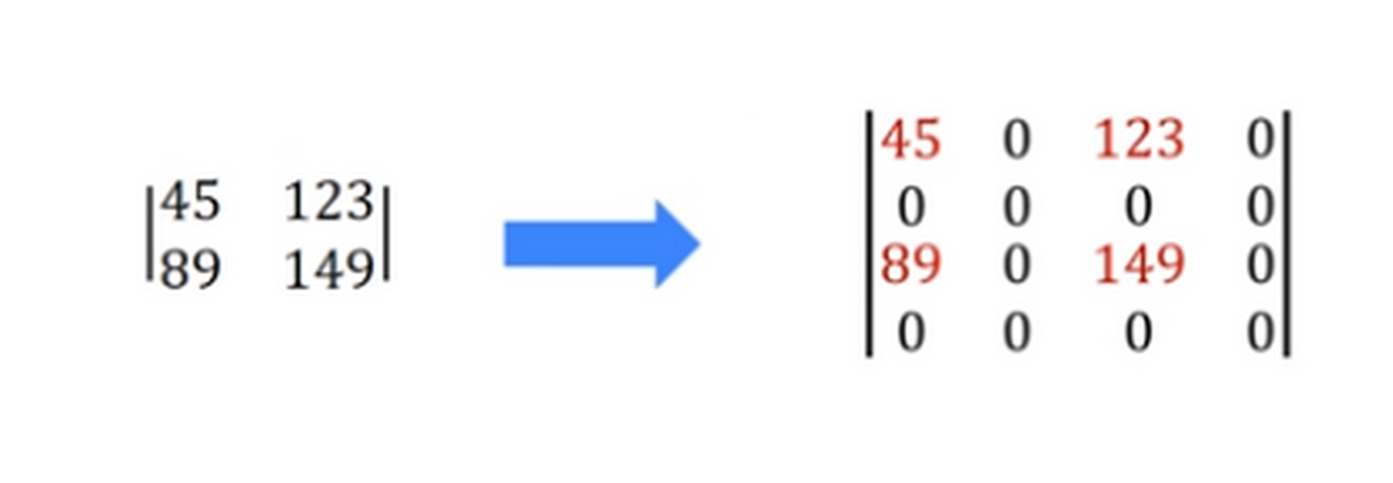

在OpenCV中，向上取样使用的函数为pyrUp()，其原型如下所示：dst = pyrUp(src[, dst[, dstsize[, borderType]]])src表示输入图像，dst表示输出图像，和输入图像具有一样的尺寸和类型dstsize表示输出图像的大小，默认值为Size()borderType表示像素外推方法，详见cv::bordertypes实现代码如下所示：


In [4]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像向上取样
r = cv2.pyrUp(img)

#显示图像
cv2.imshow('original', img)
cv2.imshow('PyrUp', r)
cv2.waitKey()
cv2.destroyAllWindows()



多次向上取样的代码如下：


In [1]:
# -*- coding: utf-8 -*-
import cv2  
import numpy as np  
import matplotlib.pyplot as plt

#读取原始图像
img = cv2.imread('test.jpg')

#图像向上取样
r1 = cv2.pyrUp(img)
r2 = cv2.pyrUp(r1)
r3 = cv2.pyrUp(r2)

#显示图像
cv2.imshow('original', img)
cv2.imshow('PyrUp1', r1)
cv2.imshow('PyrUp2', r2)
cv2.imshow('PyrUp3', r3)
cv2.waitKey()
cv2.destroyAllWindows()



输出结果如图所示，每次向上取样均为上次图像的四倍，但图像的清晰度会降低。
